In [1]:
import pandas as pd

In [2]:
news_df=pd.read_csv('train.csv')

In [3]:
news_df.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [5]:
# to get the independent features

Y=news_df['label']
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [6]:
news_df.shape

(20800, 5)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [8]:
news_df=news_df.dropna()
news_df.shape

(18285, 5)

In [9]:
messages=news_df.copy()

In [10]:
# to reset index as we have dropped NA entries from dataset

messages.reset_index(inplace=True)

In [11]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [17]:
from nltk.corpus import stopwords
#nltk-natural languge toolkit
#corpus is the entire text
#stopwords words like a, an , the, is etc
from nltk.stem.porter import PorterStemmer
#for stemming -to perform stemming that is removal of prefix and suffix to return root word


In [18]:
#To start the stemming procedure
port_stem = PorterStemmer()

In [19]:
corpus=[]

In [21]:
import re

for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [22]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [23]:
# Applying CountVectorizer
#Creating the 'bag of words' model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()


In [24]:
X.shape

(18285, 5000)

In [25]:
Y=messages['label']

In [26]:
#Divide dataset in train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=0)

In [27]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [28]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [30]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [31]:
count_df.head()

abandon  abc  abc news  abduct  abe  abedin  abl  abort  abroad  absolut  \
0        0    0         0       0    0       0    0      0       0        0   
1        0    0         0       0    0       0    0      0       0        0   
2        0    0         0       0    0       0    0      0       0        0   
3        0    0         0       0    0       0    0      0       0        0   
4        0    0         0       0    0       0    0      0       0        0   

   ...  zero  zika  zika viru  zionist  zone  zone new  zone new york  zoo  \
0  ...     0     0          0        0     0         0              0    0   
1  ...     0     0          0        0     0         0              0    0   
2  ...     0     0          0        0     0         0              0    0   
3  ...     0     0          0        0     0         0              0    0   
4  ...     0     0          0        0     0         0              0    0   

   zu  zuckerberg  
0   0           0  
1   0           0  
2   0           0  
3   0           0  
4   0           0  

[5 rows x 5000 columns]

In [32]:
import matplotlib.pyplot as plt

In [40]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False, title='Confusion mtarix', 
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if(normalize):
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Non-Normalized Confusion Matrix')
    thresh=cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i, j],horizontalalignment="center",
                color="white" if cm[i,j]>thresh else "black")
    
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

In [41]:
# MultiNomial Naive Bayes Algo

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [42]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy of model is: 0.902
Non-Normalized Confusion Matrix


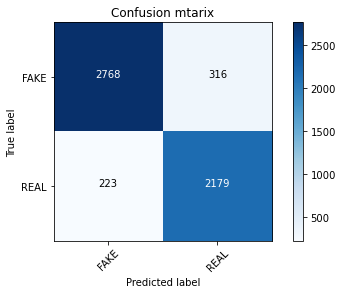

In [43]:
classifier.fit(X_train, Y_train)
pred=classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("Accuracy of model is: %0.3f" % score)
cm = metrics.confusion_matrix(Y_test,pred)
plot_confusion_matrix(cm, classes=['FAKE','REAL'])